<a href="https://colab.research.google.com/github/davidofitaly/03_linear_regression_projects/blob/main/01_make_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries




In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

###Data generation

In [2]:
from sklearn.datasets import make_regression # Import function for synthetic regression data generation

# Generate synthetic regression data
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

# Print shapes of the generated data and target
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


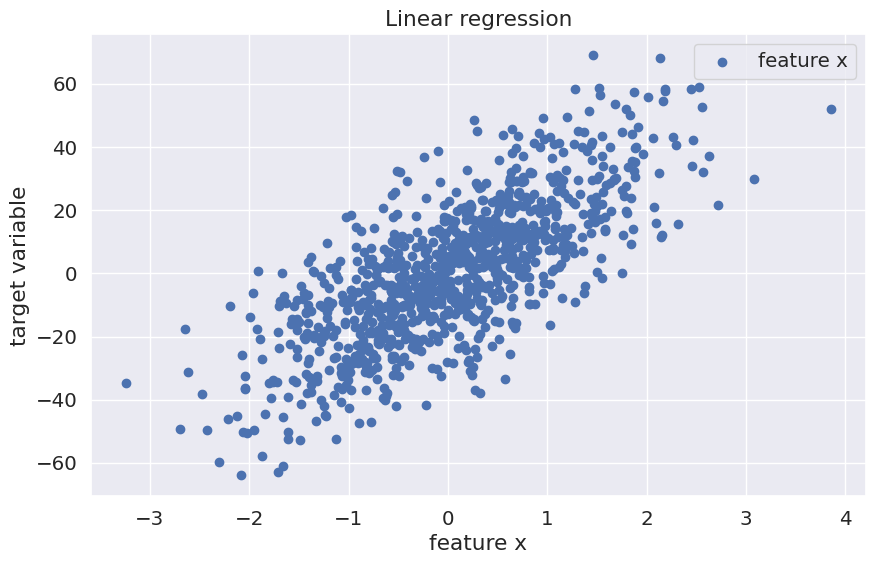

In [3]:
plt.figure(figsize=(10,6))
plt.title('Linear regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(data, target, label='feature x')
plt.legend()
plt.show()

###Division of data into training and test collection

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (700, 1)
X_test shape: (300, 1)
y_train shape: (700,)
y_test shape: (300,)


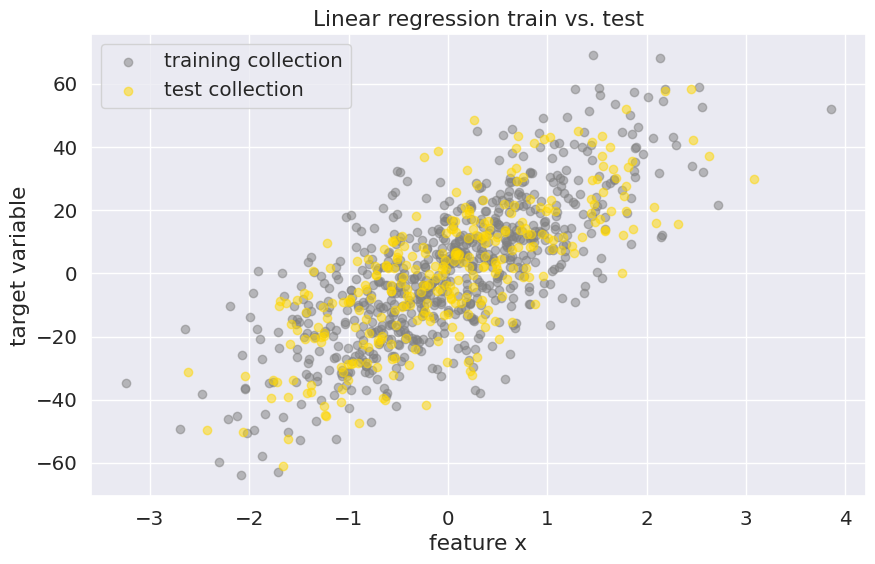

In [5]:
plt.figure(figsize=(10,6))
plt.title('Linear regression train vs. test')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training collection', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='test collection', color='gold', alpha=0.5)
plt.legend()
plt.show()


###Linear regression

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
regressor.score(X_train, y_train)

0.5406104813486023

In [8]:
regressor.score(X_test, y_test)

0.5518417147131206

In [14]:
print(f"Intercept: {regressor.intercept_:.2f}")
print(f"Coef: {regressor.coef_[0]:.2f}")

Intercept: 0.24
Coef: 16.71


###Linear regression - training set - visualization

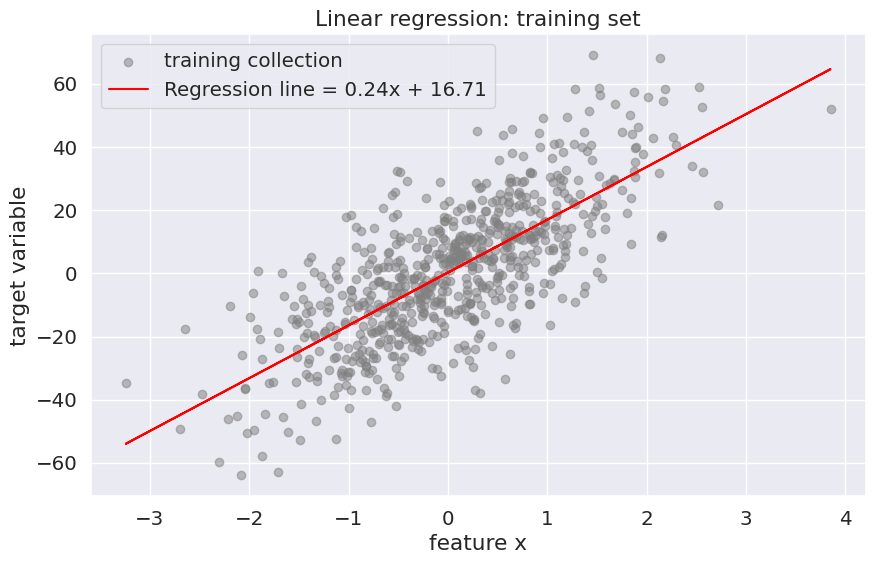

In [9]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

plt.figure(figsize=(10,6))
plt.title('Linear regression: training set')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training collection', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red', label='Regression line = '  f"{intercept:.2f}x + {slope:.2f}")
plt.legend()
plt.show()

###Linear regression - test set - visualization

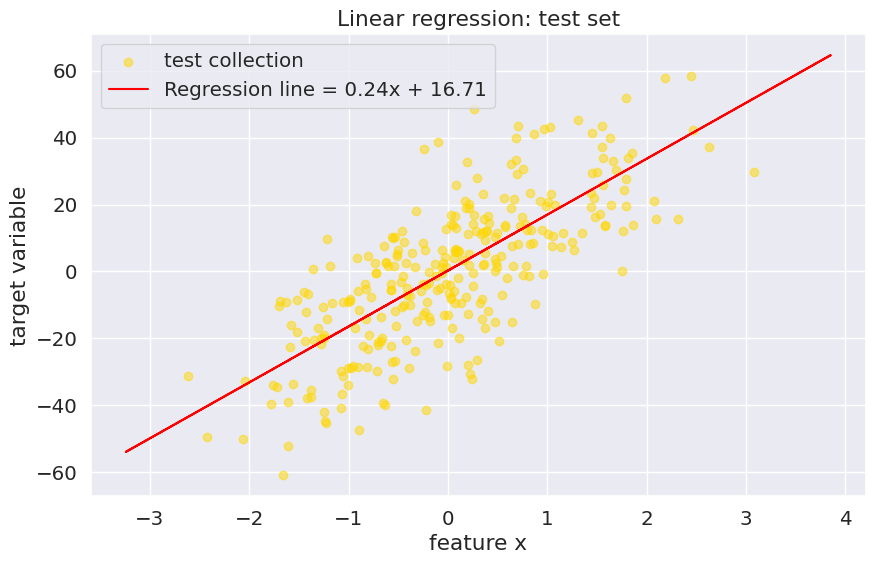

In [10]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

plt.figure(figsize=(10,6))
plt.title('Linear regression: test set')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_test, y_test, label='test collection', color='gold', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red', label='Regression line = '  f"{intercept:.2f}x + {slope:.2f}")
plt.legend()
plt.show()